In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke 
import numpy as np
import math


In [2]:
def grover_oracle_11():
    qc = QuantumCircuit(2)
    # Flip the phase of |11>
    qc.cz(0, 1)
    return qc



In [3]:
def diffusion_2qubit():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    qc.x(0)
    qc.x(1)
    qc.h(1)
    qc.cx(0, 1)
    qc.h(1)
    qc.x(0)
    qc.x(1)
    qc.h(0)
    qc.h(1)
    return qc

In [4]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)

oracle = grover_oracle_11()
diffuser = diffusion_2qubit()

num_iterations = math.floor((math.pi/4) * (2**(2/2)))  # For 2 qubits, this is 1

for _ in range(num_iterations):
    qc.compose(oracle, inplace=True)
    qc.compose(diffuser, inplace=True)

qc.measure(0, 0)
qc.measure(1, 1)

Grover's Algorithm Result: {'11': 1024}


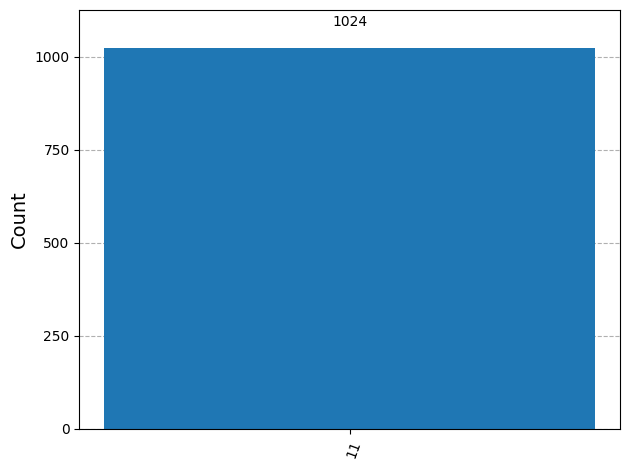

In [5]:
sim = AerSimulator()
tqc = transpile(qc, sim)
job = sim.run(tqc, shots=1024)
counts = job.result().get_counts()
print("Grover's Algorithm Result:", counts)
plot_histogram(counts)

Grover's Algorithm Result on FakeSherbrooke: {'11': 1004, '01': 13, '10': 6, '00': 1}


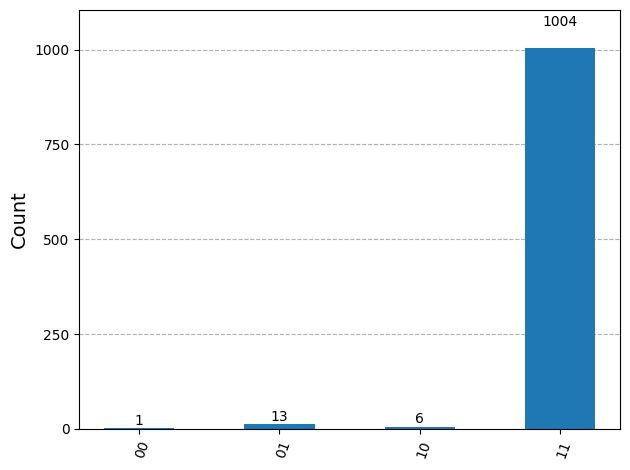

In [6]:
backend = FakeSherbrooke()

tqc = transpile(qc, backend)

job = backend.run(tqc, shots=1024)
result = job.result()
counts = result.get_counts()
print("Grover's Algorithm Result on FakeSherbrooke:", counts)
plot_histogram(counts)